# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [3]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-8.1554)


## Sampling from categorical probabilities with given probabilities

In [4]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(0)


## Animating data

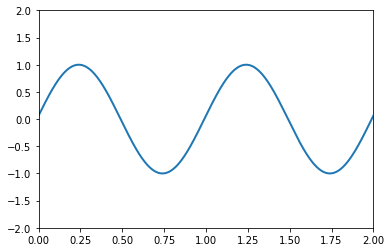

In [5]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

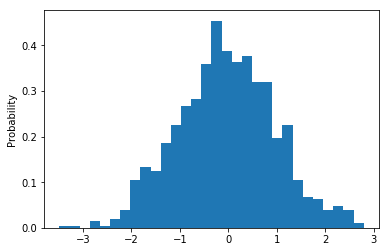

In [6]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

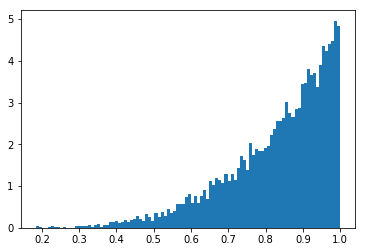

In [109]:
fig, ax = plt.subplots()
x = np.random.beta(5, 1, 10000)
_, _, patches = ax.hist(x, density=True, bins=100)


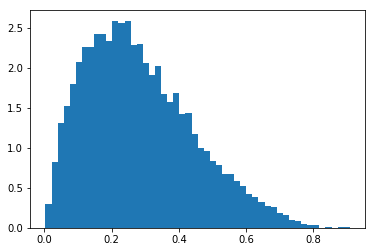

In [6]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    max_bins = 50
    fig, ax = plt.subplots()

    global _x
    _x = np.random.normal(size = 0)
    _, _, patches = ax.hist([], density=True, bins=50)

    def set_x(x):
        global _x
        _x = x
    
    # animation function. This is called sequentially
    def distribution(i):
        if i != 0: 
            new_x = np.random.beta(2, 5, 15)
            new_x = np.append(_x, new_x)
            set_x(new_x)
            
        ax.cla()
        bins = max_bins if len(_x) >= max_bins else len(_x)
        _, _, patches = ax.hist(_x, density=True, bins=max_bins)
        return (patches[0], )

    # initialization function: plot the background of each frame
    def init():
        _, _, patches = ax.hist([], density=True)
        return (patches[2],)
    # call the animator. blit=True means only re-draw the parts that have changed.
    
    anim = animation.FuncAnimation(fig, distribution,
                                   frames=500, interval=50, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Task 2

In [14]:
## Insert solution here

In [8]:
# P(x) - propability of x
# A - person is ill
# A_ - person is not ill
# B - test is positive
# B_ - test is negative

POPULATION_SIZE = 50000
PEOPLE_ILL = 50
P_TEST_NOT_ILL_PROB = 0.02
N_TEST_ILL_PROB = 0.01

def count_bayes(people_ill, population_size, p_ba_, p_b_a):  
    p_a = people_ill/population_size
    p_a_ = 1 - p_a
    p_b_a_ = 1 - p_ba_
    p_ba = 1 - p_b_a
    p_b = (p_ba_ * p_a_) + (p_ba * p_a)
    return (p_ba * p_a)/p_b

print(f'{count_bayes(PEOPLE_ILL, POPULATION_SIZE, P_TEST_NOT_ILL_PROB, N_TEST_ILL_PROB)*100:.2f}%')

4.72%


In [10]:
#population = np.random.binomial(1, p_a, size=POPULATION_SIZE)
def count_real(people_ill, population_size, iterations, positive_test_ill_prob, positive_test_not_ill_prob):
    
    #generating population and making specific number of people ill
    population = np.zeros(population_size)
    population[0:people_ill] = 1
    
    true_positives, false_positives = 0, 0
    
    for i in range(0, iterations):
        #getting random person from population
        person_index = np.random.randint(low=0, high=len(population))
        person = population[person_index]
        population = np.delete(population, person_index)  

        if person == 1 : # ill
            test_result = np.random.sample(1)
            if test_result < positive_test_ill_prob : #positive test
                true_positives += 1
        else: # not ill
            test_result = np.random.sample(1)
            if test_result < positive_test_not_ill_prob : #positive test
                false_positives += 1

    return true_positives / (true_positives + false_positives)
        
    

result  = count_real(PEOPLE_ILL, POPULATION_SIZE, POPULATION_SIZE, (1 - N_TEST_ILL_PROB), P_TEST_NOT_ILL_PROB)
print(f'{result*100:.2f}%')

4.65%


30 30


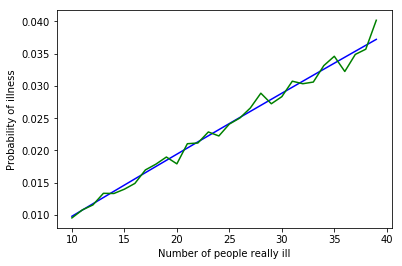

In [11]:
people_ill_values = range(10, 40)
bayes, real = [], []

for people_ill in people_ill_values:
    bayes.append(count_bayes(people_ill, POPULATION_SIZE, P_TEST_NOT_ILL_PROB, N_TEST_ILL_PROB))
    real.append(count_real(people_ill, POPULATION_SIZE, POPULATION_SIZE, (1 - N_TEST_ILL_PROB), P_TEST_NOT_ILL_PROB))
    
print(len(bayes), len(real))

plt.plot(people_ill_values, bayes, color='blue')
plt.plot(people_ill_values, real, color='green')
plt.xlabel('Number of people really ill')
plt.ylabel('Probability of illness')
plt.show()